# Advanced Image Classification with ImageNet

In this graded assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please make sure to email us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (7 Marks)
### 1a: Load and Explore the Dataset  (3 Marks)
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [25]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (40000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [7]:
print('Image dimensions:', x_train.shape[1:])
print('Number of classes:', len(set(y_train.flatten())))

Image dimensions: (32, 32, 3)
Number of classes: 100


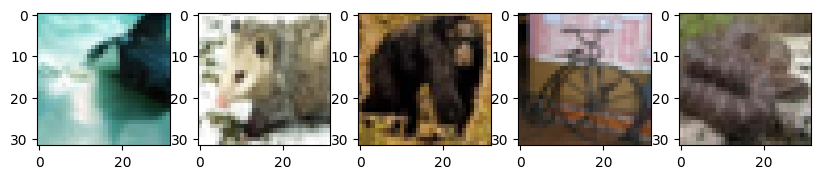

In [32]:
# Show a few examples from the training set
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [33]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


## Task 2: Model Development (8 Marks)
### Task 2a: Create a Baseline CNN Model (5 Marks)
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=x_train.shape[1:]),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

### Task 2b: Compile the model (3 Marks)

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (10 Marks)
### Task 3a: Train the Model (3 Marks)

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 12s 6ms/step - loss: 3.8551 - accuracy: 0.1124 - val_loss: 3.3015 - val_accuracy: 0.2016
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 3.0174 - accuracy: 0.2551 - val_loss: 2.8743 - val_accuracy: 0.2804
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6171 - accuracy: 0.3365 - val_loss: 2.6363 - val_accuracy: 0.3361
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3440 - accuracy: 0.3917 - val_loss: 2.5652 - val_accuracy: 0.3603
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1305 - accuracy: 0.4368 - val_loss: 2.4681 - val_accuracy: 0.3804
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9436 - accuracy: 0.4783 - val_loss: 2.4805 - val_accuracy: 0.3770
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7775 - accuracy: 0.5177 - val_loss: 2.5189 - val_accuracy

### Task 3b: Accuracy and other relevant metrics on the test set (3 Marks)

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
y_pred_indices = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(f'Accuracy: {accuracy_score(y_true, y_pred_indices)}')
print(f'F1 Score: {f1_score(y_true, y_pred_indices, average="weighted")}')

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.3929
F1 Score: 0.38832009617227964


### Task 3c: Visualize the model's learning (4 Marks)

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

- Correctly classified image: correct class probability: 0.6875
- Incorrectly classified image: predicted class probability: 0.5523, true class probability: 0.0344


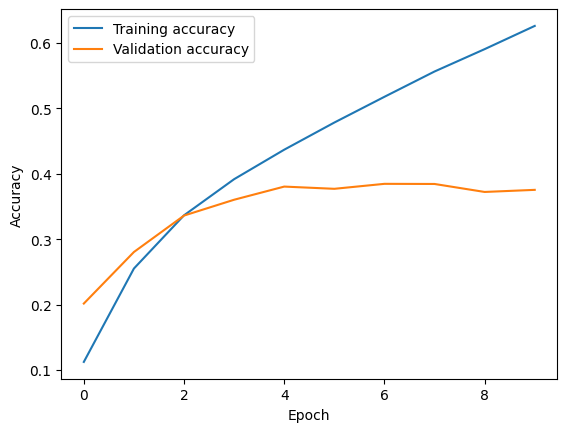

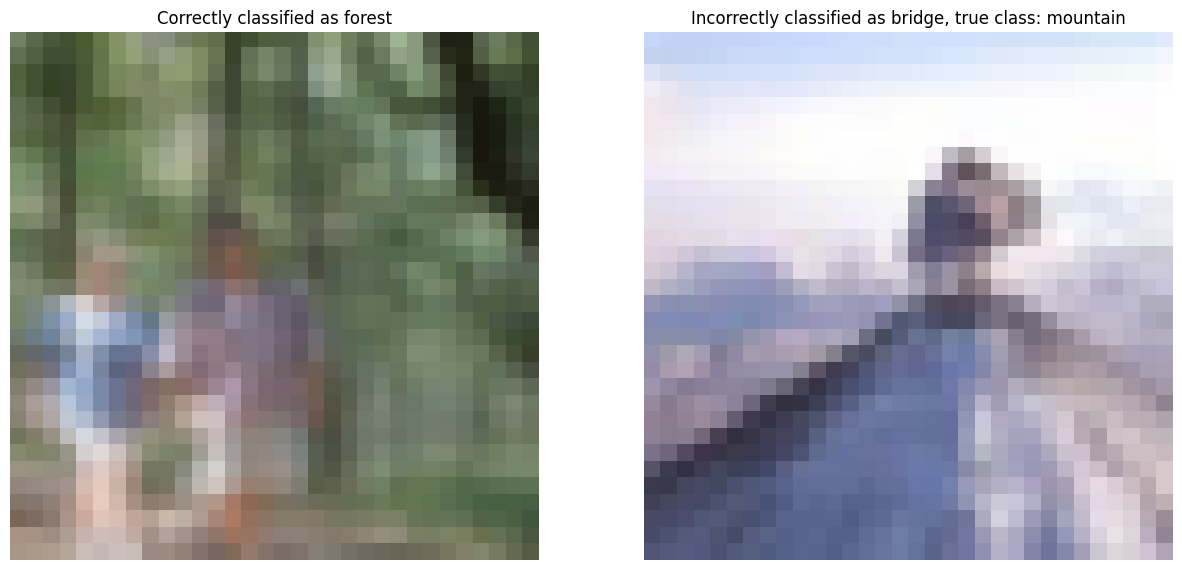

In [ ]:
import numpy as np

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

correct = np.where(y_pred_indices == y_true)[0]
incorrect = np.where(y_pred_indices != y_true)[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(x_test[correct[0]])
axes[0].set_title(f'Correctly classified as {class_names[y_pred_indices[correct[0]]]}')
axes[0].axis('off')
axes[1].imshow(x_test[incorrect[0]])
axes[1].set_title(f'Incorrectly classified as {class_names[y_pred_indices[incorrect[0]]]}, true class: {class_names[y_true[incorrect[0]]]}')
axes[1].axis('off')

print(f'- Correctly classified image: correct class probability: {y_pred[correct[0]][y_true[correct[0]]]:.4f}')
print(f'- Incorrectly classified image: predicted class probability: {y_pred[incorrect[0]][y_pred_indices[incorrect[0]]]:.4f}, true class probability: {y_pred[incorrect[0]][y_true[incorrect[0]]]:.4f}')

## Task 4: Model Enhancement (10 Marks)
### Task 4a: Implementation of at least one advanced technique (3 Marks)

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from keras.layers import Dropout

model = Sequential([
    Input(shape=x_train.shape[1:]),
    Conv2D(32, (3, 3), activation='swish', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='swish', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='swish', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='swish'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

from keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint('best_model', save_best_only=True, monitor='val_accuracy')
]

model.compile(optimizer=optimizers.Lion(), loss='categorical_crossentropy', metrics=['accuracy'])

### Task 4b: Evaluation of the enhanced model (4 Marks)

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/10
1250/1250 [==============================] - 12s 7ms/step - loss: 4.1368 - accuracy: 0.0746 - val_loss: 3.5707 - val_accuracy: 0.1767
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 3.4924 - accuracy: 0.1733 - val_loss: 3.1318 - val_accuracy: 0.2502
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 3.1815 - accuracy: 0.2288 - val_loss: 2.8862 - val_accuracy: 0.2904
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.9543 - accuracy: 0.2700 - val_loss: 2.7066 - val_accuracy: 0.3288
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.7955 - accuracy: 0.3007 - val_loss: 2.5811 - val_accuracy: 0.3517
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 2.6624 - accuracy: 0.3251 - val_loss: 2.4937 - val_accuracy: 0.3681
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.5327 - accuracy: 0.3503 - val_loss: 2.4060 - val_accuracy

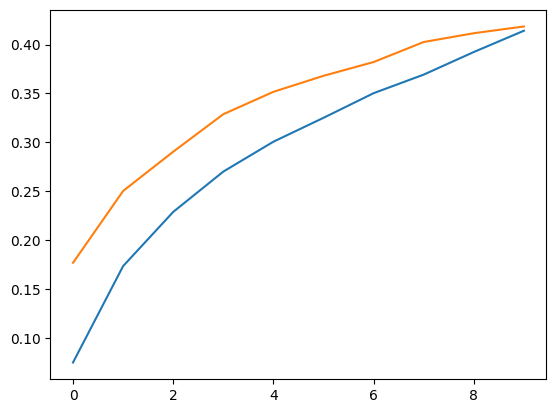

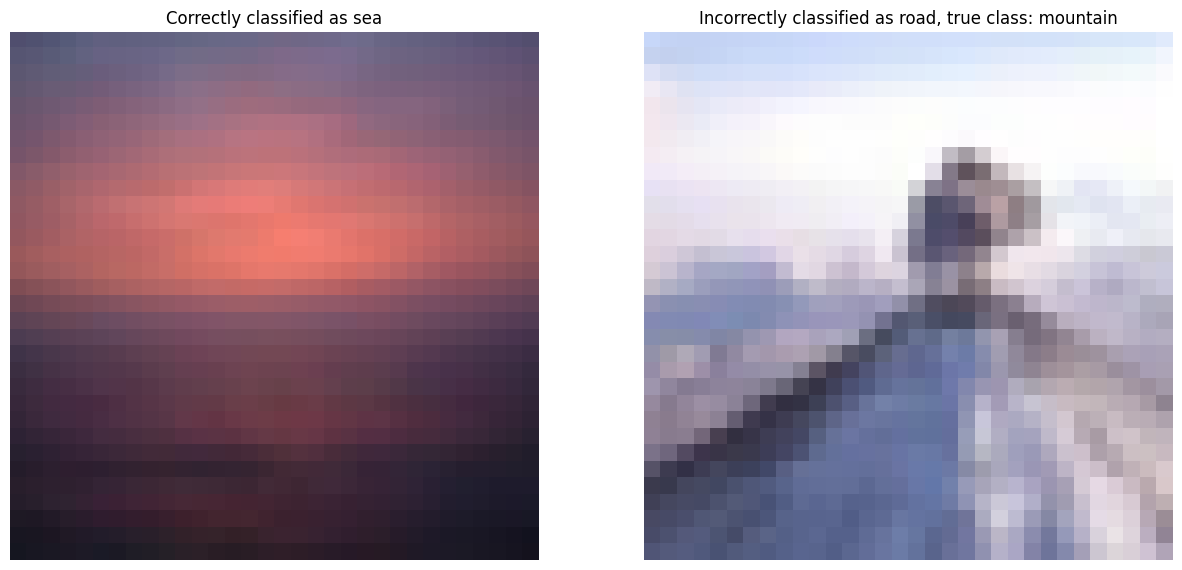

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=callbacks)

y_pred = model.predict(x_test)
y_pred_indices = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(f'Accuracy: {accuracy_score(y_true, y_pred_indices)}')
print(f'F1 Score: {f1_score(y_true, y_pred_indices, average="weighted")}')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

correct = np.where(y_pred_indices == y_true)[0]
incorrect = np.where(y_pred_indices != y_true)[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(x_test[correct[0]])
axes[0].set_title(f'Correctly classified as {class_names[y_pred_indices[correct[0]]]}')
axes[0].axis('off')
axes[1].imshow(x_test[incorrect[0]])
axes[1].set_title(f'Incorrectly classified as {class_names[y_pred_indices[incorrect[0]]]}, true class: {class_names[y_true[incorrect[0]]]}')
axes[1].axis('off')

print(f'- Correctly classified image: correct class probability: {y_pred[correct[0]][y_true[correct[0]]]:.4f}')
print(f'- Incorrectly classified image: predicted class probability: {y_pred[incorrect[0]][y_pred_indices[incorrect[0]]]:.4f}, true class probability: {y_pred[incorrect[0]][y_true[incorrect[0]]]:.4f}')

### Task 4c: Discussion of the results (3 Marks)

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here